In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn

In [2]:
#Read the data
dataset = pd.read_csv('C://Users//saket//Downloads//LSTM_train_week4.csv')

In [3]:
dataset.head()

,Date,Price,Open,High,Low,Volume,Chg%,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,4-Jan-21,47.62,48.40,49.83,47.18,528.53K,-1.85%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5-Jan-21,49.93,47.38,50.20,47.24,643.19K,4.85%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6-Jan-21,50.63,49.82,50.94,49.48,509.37K,1.40%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7-Jan-21,50.83,50.53,51.28,50.39,369.29K,0.40%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,8-Jan-21,52.24,50.93,52.75,50.81,499.42K,2.77%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#Removing the unnecessary columns
dataset = dataset.loc[:, ['Date', 'Price']]
dataset.head()

,Date,Price
0,4-Jan-21,47.62
1,5-Jan-21,49.93
2,6-Jan-21,50.63
3,7-Jan-21,50.83
4,8-Jan-21,52.24


In [5]:
dataset.tail()

,Date,Price
500,23-Nov-22,77.94
501,24-Nov-22,77.95
502,25-Nov-22,76.28
503,28-Nov-22,77.24
504,29-Nov-22,78.20


<AxesSubplot: >

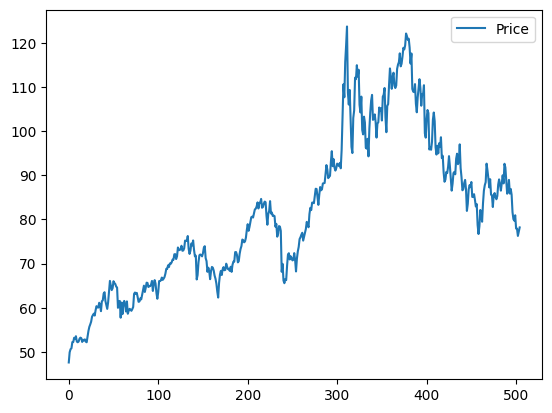

In [6]:
prc = dataset[['Price']]
prc.plot()

In [7]:
prcarr = prc.values
prcarr

array([[ 47.62],
       [ 49.93],
       [ 50.63],
       [ 50.83],
       [ 52.24],
       [ 52.25],
       [ 53.21],
       [ 52.91],
       [ 53.57],
       [ 52.36],
       [ 52.2 ],
       [ 52.36],
       [ 52.98],
       [ 53.24],
       [ 53.13],
       [ 52.27],
       [ 52.77],
       [ 52.61],
       [ 52.85],
       [ 52.34],
       [ 52.2 ],
       [ 53.55],
       [ 54.76],
       [ 55.69],
       [ 56.23],
       [ 56.85],
       [ 57.97],
       [ 58.36],
       [ 58.68],
       [ 58.24],
       [ 59.47],
       [ 60.37],
       [ 60.09],
       [ 60.05],
       [ 61.14],
       [ 60.52],
       [ 59.24],
       [ 61.49],
       [ 61.67],
       [ 63.22],
       [ 63.53],
       [ 61.5 ],
       [ 60.64],
       [ 59.75],
       [ 61.28],
       [ 63.83],
       [ 66.09],
       [ 65.05],
       [ 64.01],
       [ 64.44],
       [ 66.02],
       [ 65.61],
       [ 65.39],
       [ 64.8 ],
       [ 64.6 ],
       [ 60.  ],
       [ 61.42],
       [ 61.55],
       [ 57.76

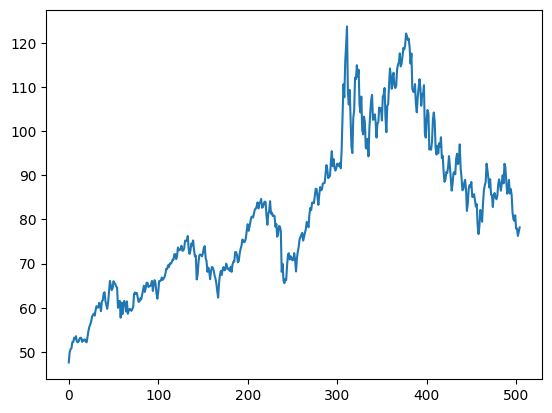

In [8]:
plt.plot(prcarr)

In [9]:
from sklearn.preprocessing import MinMaxScaler

In [10]:
#Using MinMaxScaler for normalizing data between 0 & 1
normalizer = MinMaxScaler(feature_range=(0,1))
scaled_prcarr = normalizer.fit_transform(np.array(prcarr).reshape(-1,1))

In [11]:
#Defining test and train data sizes
train_size = int(len(scaled_prcarr)*0.70)
test_size = len(scaled_prcarr) - train_size
train_size, test_size

(353, 152)

In [12]:
#Splitting data between train and test
prc_train, prc_test = scaled_prcarr[0:train_size,:], scaled_prcarr[train_size:len(scaled_prcarr),:1]
len(prc_train), len(prc_test)

(353, 152)

In [13]:
#creating dataset in time series for LSTM model 
def create_ds(dtset,step):
    Xtrain, Ytrain = [], []
    for i in range(len(dtset)-step-1):
        a = dtset[i:(i+step), 0]
        Xtrain.append(a)
        Ytrain.append(dtset[i + step, 0])
    return np.array(Xtrain), np.array(Ytrain)

In [14]:
#Taking 100 days price as one record for training
time_stamp = 100
X_train, y_train = create_ds(prc_train,time_stamp)
X_test, y_test = create_ds(prc_test,time_stamp)

In [15]:
X_train.shape,y_train.shape

((252, 100), (252,))

In [16]:
X_test.shape,y_test.shape

((51, 100), (51,))

In [17]:
#Reshaping data to fit into LSTM model
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [18]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [19]:
#Creating LSTM model using keras
model = Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1],1)))
model.add(LSTM(units=50,return_sequences=True))
model.add(LSTM(units=50))
model.add(Dense(units=1,activation='linear'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [20]:
#Training model with adam optimizer and mean squared error loss function
model.compile(loss='mean_squared_error',optimizer='adam')
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64)

Epoch 1/100
4/4 [==============================] - 7s 462ms/step - loss: 0.1160 - val_loss: 0.0049
Epoch 2/100
4/4 [==============================] - 1s 134ms/step - loss: 0.0274 - val_loss: 0.0354
Epoch 3/100
4/4 [==============================] - 1s 138ms/step - loss: 0.0134 - val_loss: 0.0078
Epoch 4/100
4/4 [==============================] - 1s 139ms/step - loss: 0.0184 - val_loss: 0.0100
Epoch 5/100
4/4 [==============================] - 1s 134ms/step - loss: 0.0135 - val_loss: 0.0044
Epoch 6/100
4/4 [==============================] - 1s 136ms/step - loss: 0.0091 - val_loss: 0.0138
Epoch 7/100
4/4 [==============================] - 1s 147ms/step - loss: 0.0100 - val_loss: 0.0060
Epoch 8/100
4/4 [==============================] - 1s 144ms/step - loss: 0.0074 - val_loss: 0.0039
Epoch 9/100
4/4 [==============================] - 1s 130ms/step - loss: 0.0084 - val_loss: 0.0038
Epoch 10/100
4/4 [==============================] - 1s 132ms/step - loss: 0.0068 - val_loss: 0.0071
Epoch 11/

4/4 [==============================] - 1s 161ms/step - loss: 0.0034 - val_loss: 0.0044
Epoch 84/100
4/4 [==============================] - 1s 155ms/step - loss: 0.0034 - val_loss: 0.0042
Epoch 85/100
4/4 [==============================] - 1s 156ms/step - loss: 0.0035 - val_loss: 0.0038
Epoch 86/100
4/4 [==============================] - 1s 159ms/step - loss: 0.0036 - val_loss: 0.0044
Epoch 87/100
4/4 [==============================] - 1s 157ms/step - loss: 0.0033 - val_loss: 0.0043
Epoch 88/100
4/4 [==============================] - 1s 153ms/step - loss: 0.0033 - val_loss: 0.0044
Epoch 89/100
4/4 [==============================] - 1s 154ms/step - loss: 0.0033 - val_loss: 0.0038
Epoch 90/100
4/4 [==============================] - 1s 160ms/step - loss: 0.0034 - val_loss: 0.0051
Epoch 91/100
4/4 [==============================] - 1s 156ms/step - loss: 0.0035 - val_loss: 0.0037
Epoch 92/100
4/4 [==============================] - 1s 156ms/step - loss: 0.0037 - val_loss: 0.0056
Epoch 93/100


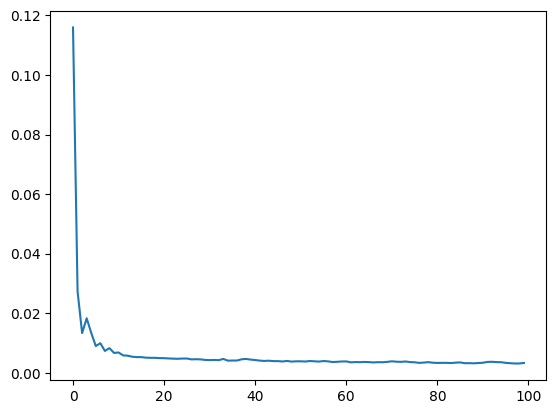

In [21]:
#PLotting loss, it shows that loss has decreased significantly and model trained well
loss = model.history.history['loss']
plt.plot(loss)

In [22]:
#Predicitng on train and test data
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

2/2 [==============================] - 0s 24ms/step


In [23]:
#Inverse transform to get actual value
train_predict = normalizer.inverse_transform(train_predict)
test_predict = normalizer.inverse_transform(test_predict)

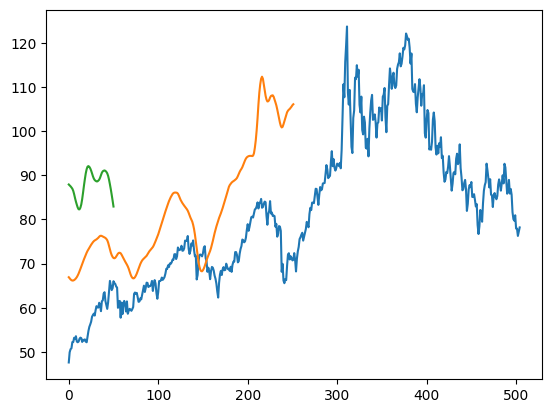

In [24]:
#Comparing using visuals
plt.plot(normalizer.inverse_transform(scaled_prcarr))
plt.plot(train_predict)
plt.plot(test_predict)

In [25]:
test = np.vstack((train_predict,test_predict))

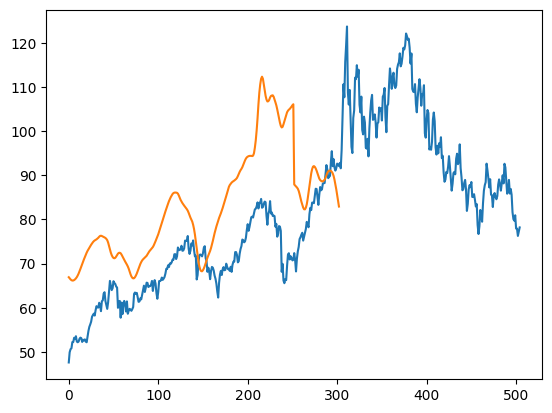

In [26]:
#Combining the predited data to create uniform data visualization
plt.plot(normalizer.inverse_transform(scaled_prcarr))
plt.plot(test)

In [27]:
len(prc_test)

152

In [28]:
#Getting the last 100 days records
fut_inp = prc_test[52:]
fut_inp = fut_inp.reshape(1,-1)

In [29]:
tmp_inp = list(fut_inp)

In [30]:
fut_inp.shape

(1, 100)

In [31]:
#Creating list of the last 100 data
tmp_inp = tmp_inp[0].tolist()

In [32]:
#Predicting next 30 days price using the current data
#It will predict in sliding window manner (algorithm) with stride 1
lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(tmp_inp)>100):
        fut_inp = np.array(tmp_inp[1:])
        fut_inp=fut_inp.reshape(1,-1)
        fut_inp = fut_inp.reshape((1, n_steps, 1))
        yhat = model.predict(fut_inp, verbose=0)
        tmp_inp.extend(yhat[0].tolist())
        tmp_inp = tmp_inp[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        fut_inp = fut_inp.reshape((1, n_steps,1))
        yhat = model.predict(fut_inp, verbose=0)
        tmp_inp.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[[0.4318205416202545], [0.4202404022216797], [0.4120885133743286], [0.40692847967147827], [0.40422704815864563], [0.403476357460022], [0.40424901247024536], [0.40621158480644226], [0.4091189205646515], [0.41279804706573486], [0.41713058948516846], [0.4220362603664398], [0.427458792924881], [0.4333571791648865], [0.43969643115997314], [0.4464452266693115], [0.4535713791847229], [0.461040735244751], [0.46881720423698425], [0.47686201333999634], [0.4851337969303131], [0.49358922243118286], [0.5021837949752808], [0.510871410369873], [0.5196059942245483], [0.5283404588699341], [0.5370293855667114], [0.5456286072731018], [0.5540953874588013], [0.562390148639679]]


In [33]:
len(scaled_prcarr)

505

In [34]:
#Creating a dummy plane to plot graph one after another
plot_new=np.arange(1,101)
plot_pred=np.arange(101,131)

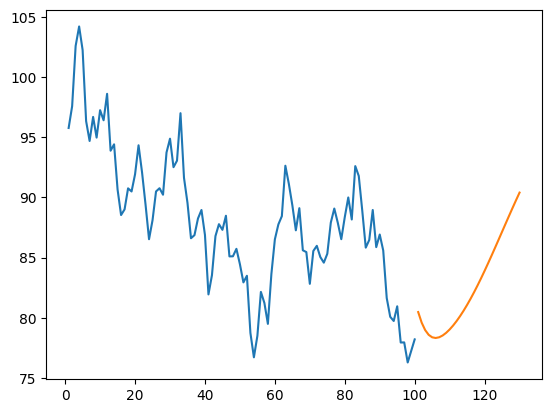

In [35]:
plt.plot(plot_new, normalizer.inverse_transform(scaled_prcarr[405:]))
plt.plot(plot_pred, normalizer.inverse_transform(lst_output))

In [36]:
prcarr_new = scaled_prcarr.tolist()
len(prcarr_new)

505

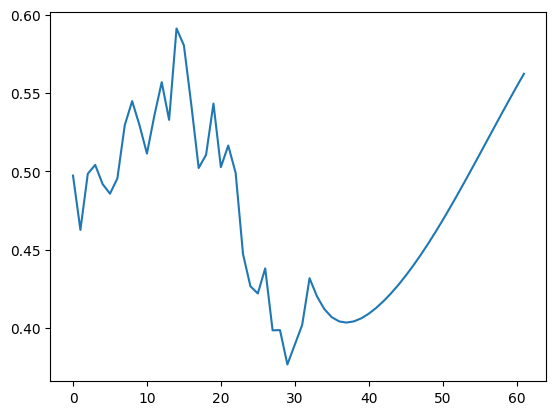

In [37]:
#filling the missing value with approx value
prcarr_new.extend(lst_output)
plt.plot(prcarr_new[473:])

In [178]:
#Creating final data for plotting
final_graph = normalizer.inverse_transform(prcarr_new).tolist()

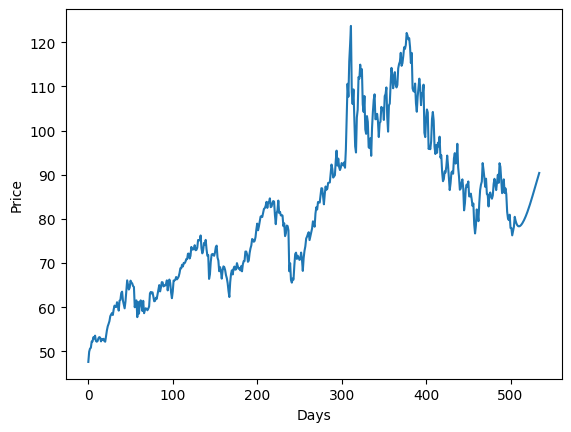

In [179]:
#Plotting final results with predicted value after 30 Days
plt.plot(final_graph,)
plt.ylabel("Price")
plt.xlabel("Days")
plt.show()

In [180]:
final_graph

[[47.62],
 [49.93],
 [50.63],
 [50.83],
 [52.24],
 [52.25000000000001],
 [53.21],
 [52.91],
 [53.57000000000001],
 [52.36000000000001],
 [52.2],
 [52.36000000000001],
 [52.98],
 [53.24000000000001],
 [53.129999999999995],
 [52.27],
 [52.77],
 [52.61],
 [52.85],
 [52.34],
 [52.2],
 [53.55],
 [54.76],
 [55.69],
 [56.23],
 [56.85],
 [57.970000000000006],
 [58.36],
 [58.68],
 [58.24],
 [59.47],
 [60.37],
 [60.09],
 [60.05],
 [61.14],
 [60.52],
 [59.24],
 [61.489999999999995],
 [61.67000000000001],
 [63.22],
 [63.53],
 [61.5],
 [60.64],
 [59.75],
 [61.28],
 [63.83],
 [66.09],
 [65.05],
 [64.01],
 [64.44],
 [66.02],
 [65.61],
 [65.39],
 [64.8],
 [64.6],
 [60.0],
 [61.42],
 [61.55],
 [57.76],
 [61.18],
 [58.56],
 [60.97],
 [61.56000000000001],
 [60.55],
 [59.16],
 [61.45000000000001],
 [58.65],
 [59.32999999999999],
 [59.77],
 [59.6],
 [59.32],
 [59.7],
 [60.18],
 [63.15],
 [63.46],
 [63.13],
 [63.38],
 [62.44],
 [61.35],
 [61.43],
 [62.14],
 [61.91],
 [62.94],
 [63.86],
 [65.01],
 [63.579999

In [181]:
#type(final_graph[0])
#final_graph
for i in range(len(final_graph)):
    final_graph[i] = final_graph[i][0]
    
final_graph

[47.62,
 49.93,
 50.63,
 50.83,
 52.24,
 52.25000000000001,
 53.21,
 52.91,
 53.57000000000001,
 52.36000000000001,
 52.2,
 52.36000000000001,
 52.98,
 53.24000000000001,
 53.129999999999995,
 52.27,
 52.77,
 52.61,
 52.85,
 52.34,
 52.2,
 53.55,
 54.76,
 55.69,
 56.23,
 56.85,
 57.970000000000006,
 58.36,
 58.68,
 58.24,
 59.47,
 60.37,
 60.09,
 60.05,
 61.14,
 60.52,
 59.24,
 61.489999999999995,
 61.67000000000001,
 63.22,
 63.53,
 61.5,
 60.64,
 59.75,
 61.28,
 63.83,
 66.09,
 65.05,
 64.01,
 64.44,
 66.02,
 65.61,
 65.39,
 64.8,
 64.6,
 60.0,
 61.42,
 61.55,
 57.76,
 61.18,
 58.56,
 60.97,
 61.56000000000001,
 60.55,
 59.16,
 61.45000000000001,
 58.65,
 59.32999999999999,
 59.77,
 59.6,
 59.32,
 59.7,
 60.18,
 63.15,
 63.46,
 63.13,
 63.38,
 62.44,
 61.35,
 61.43,
 62.14,
 61.91,
 62.94,
 63.86,
 65.01,
 63.57999999999999,
 64.49,
 65.69,
 65.63,
 64.71,
 64.9,
 64.92,
 65.28,
 66.08,
 63.82,
 65.37,
 66.27,
 65.49,
 63.35999999999999,
 62.05,
 63.57999999999999,
 66.05,
 66.07,
 6

In [182]:

data = pd.DataFrame({'Pred_price':final_graph})
data['Day_no.'] = data.index + 1
data


,Pred_price,Day_no.
0,47.620000,1
1,49.930000,2
2,50.630000,3
3,50.830000,4
4,52.240000,5
...,...,...
530,87.816142,531
531,88.477196,532
532,89.131424,533
533,89.775577,534


In [183]:
#define function to swap columns
def swap_columns(df, col1, col2):
    col_list = list(df.columns)
    x, y = col_list.index(col1), col_list.index(col2)
    col_list[y], col_list[x] = col_list[x], col_list[y]
    df = df[col_list]
    return df

#swap points and rebounds columns
data = swap_columns(data, 'Pred_price', 'Day_no.')
data

,Day_no.,Pred_price
0,1,47.620000
1,2,49.930000
2,3,50.630000
3,4,50.830000
4,5,52.240000
...,...,...
530,531,87.816142
531,532,88.477196
532,533,89.131424
533,534,89.775577


In [184]:
data = data.loc[505:,['Day_no.','Pred_price']]
data

,Day_no.,Pred_price
505,506,80.472907
506,507,79.591890
507,508,78.971694
508,509,78.579119
509,510,78.373594
510,511,78.316481
511,512,78.375265
512,513,78.524577
513,514,78.745767
514,515,79.025675


In [185]:
data.to_csv('oilprice_pred.csv', index=False)